# تشکیل پرتفو در بازار بورس تهران

In [1]:
import numpy as np
import pandas as pd
import finpy_tse as tse
import mplfinance as mplf
import scipy.stats as stt
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## دریافت فهرست تمامی سهام‌ها

- If **bourse** be **True** ===> دریافت سهام مربوط به بازار بورس

- If **farabourse** be **True** ===> دریافت سهام مربوط به بازار فرابورس

- If **payeh** be **True** ===> دریافت سهام مربوط به بازار پایه

- If **detailed_list** be **True** ===> اضافه کردن اطلاعات سربرگ سهام به دیتافریم خروجی

- If **show_progress** be **True** ===> نمایش روند دریافت داده

- If **save_excel** be **True** ===> ذخیره دیتافریم در فایل ===> excel

- If **save_csv** be **True** ===> ذخیره دیتافریم در فایل ===> csv

In [3]:
DF1 = tse.Build_Market_StockList(bourse=True,
                                 farabourse=True,
                                 payeh=True,
                                 detailed_list=False,
                                 show_progress=True,
                                 save_excel=False,
                                 save_csv=False)

Gathering Payeh market stock list ...


In [4]:
DF1

,Name,Market
Ticker,,
آباد,توریستی ورفاهی آبادگران ایران,بورس
آبادا,تولید نیروی برق آبادان,بورس
آپ,آسان پرداخت پرشین,بورس
آسیا,بیمه آسیا,بورس
اپال,فرآوری معدنی اپال کانی پارس,بورس
...,...,...
ولانا,شرکت لیزینگ آریا دانا,پایه زرد
سمتاز,سیمان ممتازان کرمان,پایه زرد
تپکو,تولیدتجهیزات سنگین هپکو,پایه زرد


In [5]:
DF1.iloc[500]

Name      فرآوری زغال سنگ پروده طبس
Market                      فرابورس
Name: کپرور, dtype: object

In [6]:
print(DF1.head())

                                 Name Market
Ticker                                      
آباد    توریستی ورفاهی آبادگران ایران   بورس
آبادا          تولید نیروی برق آبادان   بورس
آپ                  آسان پرداخت پرشین   بورس
آسیا                        بیمه آسیا   بورس
اپال      فرآوری معدنی اپال کانی پارس   بورس


In [7]:
Tickers = DF1.index.to_list()

In [8]:
Tickers

['آباد',
 'آبادا',
 'آپ',
 'آسیا',
 'اپال',
 'اتکام',
 'اخابر',
 'اسیاتک',
 'افق',
 'البرز',
 'امید',
 'امین',
 'انرژی3',
 'بالبر',
 'بترانس',
 'برکت',
 'بسویچ',
 'بشهاب',
 'بفجر',
 'بکاب',
 'بکام',
 'بموتو',
 'بنیرو',
 'بورس',
 'بوعلی',
 'پارس',
 'پارسان',
 'پارسیان',
 'پاسا',
 'پاکشو',
 'پتایر',
 'پترول',
 'پدرخش',
 'پرداخت',
 'پردیس',
 'پسهند',
 'پکرمان',
 'پکویر',
 'پلاسک',
 'تاپیکو',
 'تاصیکو',
 'تایرا',
 'تپمپی',
 'تکشا',
 'تکمبا',
 'تکنو',
 'تملت',
 'تنوین',
 'تیپیکو',
 'ثاخت',
 'ثامان',
 'ثامید',
 'ثبهساز',
 'ثشاهد',
 'ثشرق',
 'ثفارس',
 'ثمسکن',
 'ثنوسا',
 'جم',
 'جم پیلن',
 'چافست',
 'چدن',
 'چفیبر',
 'چکاپا',
 'چکارن',
 'چکاوه',
 'حپترو',
 'حتاید',
 'حتوکا',
 'حفارس',
 'حفاری',
 'حکشتی',
 'خاذین',
 'خاهن',
 'خبهمن',
 'خپویش',
 'ختراک',
 'ختور',
 'ختوقا',
 'خچرخش',
 'خراسان',
 'خریخت',
 'خرینگ',
 'خزامیا',
 'خزر',
 'خساپا',
 'خشرق',
 'خفنر',
 'خکار',
 'خکمک',
 'خگستر',
 'خلنت',
 'خمحرکه',
 'خمحور',
 'خمهر',
 'خموتور',
 'خنصیر',
 'خودرو',
 'خوساز',
 'دابور',
 'دارو',
 'داسوه',


## دریافت تاریخچه شاخص کل

- If **ignore_date** be **True** ===>  کل تاریخچه را برمی‌گرداند و دو ورودی قبلی را نادیده میگیرد می‌کند.

- If **just_adj_close** be **True** ===> مقدار تعدیل شده قیمت پایانی را برمی‌گرداند.
 
- If **show_weekday** be **True** ===> اضافه کردن روز هفته به دیتافریم خروجی 

- If **double_date** be **True** ===> اضافه کردن تاریخ میلادی به دیتافریم خروجی

In [9]:
DF2 = tse.Get_CWI_History(start_date='1396-01-01',
                          end_date='1401-10-01',
                          ignore_date=False,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

## Candle Stick plot

In [10]:
DF2.index = DF2['Date']

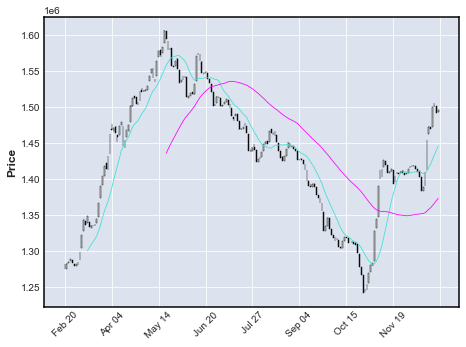

In [11]:
mplf.plot(DF2[-200:], type='candle', mav=(13, 55))
plt.show()

## OHLC plot

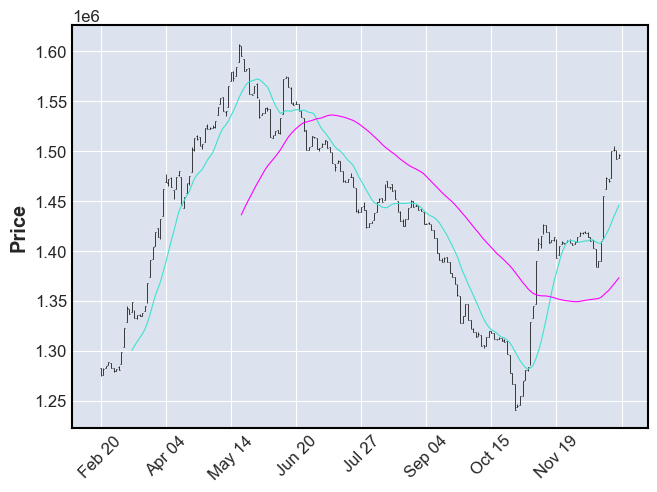

In [12]:
mplf.plot(DF2[-200:], type='ohlc', mav=(13, 55))
plt.show()

## دریافت تاریخچه شاخص هموزن

In [13]:
DF2 = tse.Get_CWI_History(start_date='1397-01-01',
                          end_date='1401-10-01',
                          ignore_date=False,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)
DF3 = tse.Get_EWI_History(start_date='1397-01-01',
                          end_date='1401-10-01',
                          ignore_date=False,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

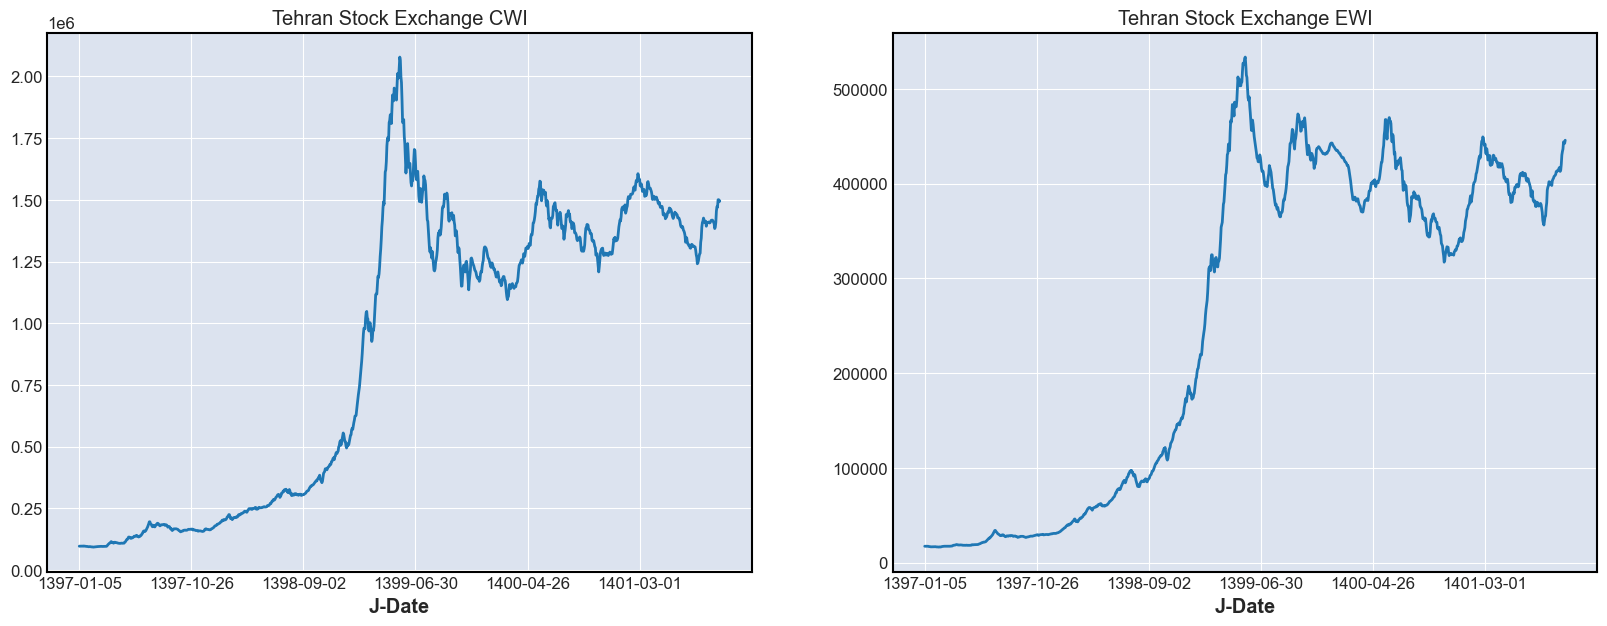

In [14]:
CWI = DF2['Adj Close']
EWI = DF3['Adj Close']

fig, ax = plt.subplots(1,2,figsize=(20,7)) 
CWI.plot(grid=True , ax=ax[0])
ax[0].set_title("Tehran Stock Exchange CWI")

EWI.plot(grid=True, ax=ax[1])
ax[1].set_title("Tehran Stock Exchange EWI")
plt.show()

## همبستگی بین شاخص کل و هموزن

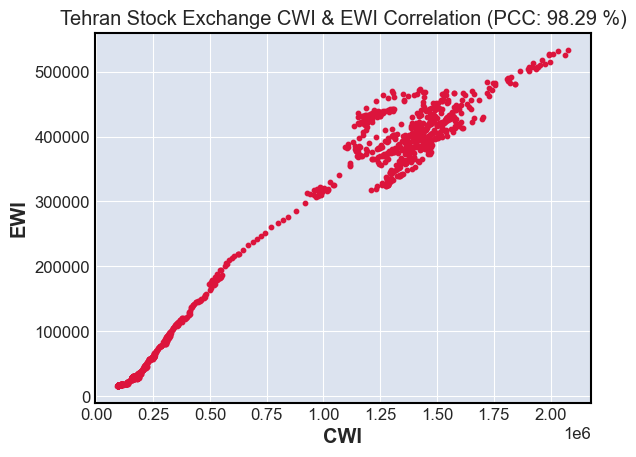

In [15]:
PCC = 100 * stt.pearsonr(CWI, EWI)[0]

plt.scatter(CWI, EWI, s=10, color='crimson')
plt.title(f'Tehran Stock Exchange CWI & EWI Correlation (PCC: {round(PCC, 2)} %)')
plt.xlabel('CWI')
plt.ylabel('EWI')
plt.show()

علاوه بر قیمت، می‌توان نمودار بالا را برای لگاریتم قیمت نیز رسم کرد:

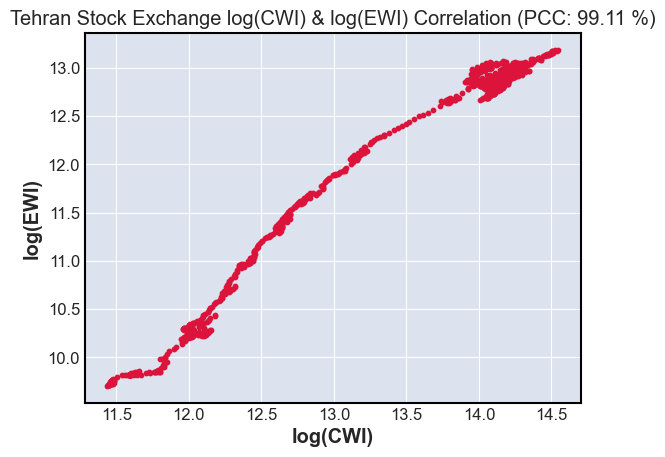

In [16]:
logCWI = np.log(CWI)
logEWI = np.log(EWI)

PCC = 100 * stt.pearsonr(logCWI, logEWI)[0]

plt.scatter(logCWI, logEWI, s=10, color='crimson')
plt.title(f'Tehran Stock Exchange log(CWI) & log(EWI) Correlation (PCC: {round(PCC, 2)} %)')
plt.xlabel('log(CWI)')
plt.ylabel('log(EWI)')
plt.show()

## دریافت تاریخچه قیمت سهام

In [17]:
DF4 = tse.Get_Price_History(stock='شبندر',
                            start_date="1399-01-01",
                            end_date="1401-01-01",
                            ignore_date=True,
                            adjust_price=True,
                            show_weekday=True,
                            double_date=True)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
DF4

پس از اجرا، یک دیتا فریم با ۱۸ ستون ایجاد خواهد شد. می‌توانیم دیتافریم را به شکل زیر تمیز و اصلاح کنیم:

In [ ]:
DropList = ['Open', 'High', 'Low', 'Close', 'Final',
            'No', 'Ticker', 'Name', 'Part']

DF4.drop(columns=DropList, axis=1, inplace=True)

RenameDict = {'Adj Open': 'Open',
              'Adj High': 'High',
              'Adj Low': 'Low',
              'Adj Close': 'Close',
              'Adj Final': 'Final'}

DF4.rename(columns=RenameDict, inplace=True)

In [ ]:
DF4

## دریافت قیمت دلار به ریال

In [20]:
USD = tse.Get_USD_RIAL(
    start_date='1395-01-01',
    end_date='1401-10-15',
    ignore_date=False,
    show_weekday=False,
    double_date=False,
)

In [21]:
USD

,Open,High,Low,Close
J-Date,,,,
1395-01-07,34300,34750,34300,34680
1395-01-08,34660,34670,34660,34660
1395-01-10,34960,35140,34960,35130
1395-01-11,34890,34890,34820,34820
1395-01-12,34850,34850,34850,34850
...,...,...,...,...
1401-10-11,386820,397090,379820,393000
1401-10-12,391440,391590,387320,387590
1401-10-13,387530,387590,374520,397530


## دریافت اطلاعات لحظه‌ای بازار

In [ ]:
DF5 = tse.Get_MarketWatch(save_excel=False)

در این دیتافریم، ستون‌های متعددی از جمله قیمت‌ها، درصد تغییرات، حد بالا و پایین قیمت مجاز روزانه، ارزش معاملات و صف‌ها، میانگین ارزش سرانه صف‌ها، حجم خرید حقیقی و حقوقی و… وجود دارد.

In [25]:
stocks = tse.Get_Price_History(stock='شبندر',
                            start_date='1400-01-01',
                            end_date='1401-01-01',
                            ignore_date=False,
                            adjust_price=True,
                            show_weekday=True,
                            double_date=True)

AttributeError: Can only use .dt accessor with datetimelike values

In [24]:
import yfinance as yf
tickers  = ["AMZN","KO","MSFT"]
n_assets = len(tickers) 

stocks = pd.DataFrame()
for stock_name in tickers:
    # داده های روزانه
    stocks[stock_name] = yf.download(stock_name, start="2020-01-01", end="2022-12-01" , interval= "1d")["Adj Close"]   
    
stocks = round(stocks,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [54]:
stocks#.tail()

,AMZN,KO,MSFT
Date,,,
2019-12-31,92.39,50.39,153.31
2020-01-02,94.90,50.06,156.15
2020-01-03,93.75,49.79,154.21
2020-01-06,95.14,49.77,154.61
2020-01-07,95.34,49.39,153.20
...,...,...,...
2022-11-23,94.13,62.19,247.58
2022-11-25,93.41,62.25,247.49
2022-11-28,93.95,62.26,241.76


In [55]:
def compute_returns(s):

    if isinstance(s, pd.DataFrame):
        return s.aggregate( compute_returns )
    elif isinstance(s, pd.Series):
        return s / s.shift(1) - 1
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")

In [56]:
# محاسبه بازده روزانه
daily_rets = msj.compute_returns(stocks)
daily_rets#.tail()
daily_rets.dropna()

,AMZN,KO,MSFT
Date,,,
2020-01-02,0.027167,-0.006549,0.018525
2020-01-03,-0.012118,-0.005394,-0.012424
2020-01-06,0.014827,-0.000402,0.002594
2020-01-07,0.002102,-0.007635,-0.009120
2020-01-08,-0.007762,0.001822,0.015927
...,...,...,...
2022-11-23,0.009979,0.004523,0.010407
2022-11-25,-0.007649,0.000965,-0.000364
2022-11-28,0.005781,0.000161,-0.023152


In [57]:
# Annualize returns (periods = 252)
ann_rets = msj.annualize_rets(daily_rets, 252)
round(ann_rets,2)

AMZN    0.02
KO      0.08
MSFT    0.19
dtype: float64

In [58]:
# میانگین بازده روزانه و کوواریانس بازده روزانه دو دارایی را محاسبه می کنیم
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,AMZN,KO,MSFT
AMZN,0.000610,0.000108,0.000380
KO,0.000108,0.000245,0.000177
MSFT,0.000380,0.000177,0.000485


اکنون 4000 پرتفوی را با وزن های تخصیص یافته به سهام فوق شبیه سازی می کنیم:

In [59]:
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

In [62]:
for i in range(num_portfolios):
    # انتخاب وزن های تصادفی به تعداد دارایی ها
    weights = np.random.random(n_assets)
    # حال جوری تنظیمشان میکنیم که جمعشان 1 شود
    weights /= np.sum(weights)
    
    # بازده سالانه پرتفوی
    ann_rets = msj.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = msj.portfolio_return(weights, ann_rets)        

    # نوسانات سالانه پرتفوی
    portfolio_vol = msj.portfolio_vol(weights, cov_rets)
    portfolio_vol = msj.annualize_vol(portfolio_vol, periods_per_year)

    # نسبت شارپ سالانه پرتفوی
    portfolio_shpr = msj.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)
    
    # create dataframe   
    portfolios = portfolios.append( {"return":portfolio_ret, 
                                     "volatility":portfolio_vol, 
                                     "sharpe ratio":portfolio_shpr, 
                                     "w1": weights[0], "w2": weights[1], "w3": weights[2]}, 
                                     ignore_index=True)

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p

In [63]:
portfolios.head()

,return,volatility,sharpe ratio,w1,w2,w3
0,0.105729,0.248463,0.42553,0.157506,0.531931,0.310563
1,0.095581,0.239186,0.399609,0.143134,0.649785,0.207081
2,0.075583,0.315229,0.239771,0.562409,0.151787,0.285804
3,0.143575,0.274979,0.522131,0.037191,0.376134,0.586675
4,0.077622,0.25703,0.301995,0.363906,0.456676,0.179419


In [64]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   return        4699 non-null   object
 1   volatility    4699 non-null   object
 2   sharpe ratio  4699 non-null   object
 3   w1            4699 non-null   object
 4   w2            4699 non-null   object
 5   w3            4699 non-null   object
dtypes: object(6)
memory usage: 220.4+ KB


In [65]:
portfolios["return"] = pd.to_numeric(portfolios["return"])
portfolios["volatility"] = pd.to_numeric(portfolios["volatility"])
portfolios["sharpe ratio"] = pd.to_numeric(portfolios["sharpe ratio"])
portfolios["w1"] = pd.to_numeric(portfolios["w1"])
portfolios["w2"] = pd.to_numeric(portfolios["w2"])
portfolios["w3"] = pd.to_numeric(portfolios["w3"])

In [66]:
portfolios["volatility"].argmin()

4096

In [67]:
portfolios.iloc[2753]

return          0.070932
volatility      0.268375
sharpe ratio    0.264302
w1              0.440427
w2              0.394065
w3              0.165508
Name: 2753, dtype: float64

In [68]:
portfolios["sharpe ratio"].argmax()

2312

In [69]:
portfolios.iloc[3200]

return          0.072159
volatility      0.253782
sharpe ratio    0.284335
w1              0.375533
w2              0.488526
w3              0.135942
Name: 3200, dtype: float64

In [70]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   return        4699 non-null   float64
 1   volatility    4699 non-null   float64
 2   sharpe ratio  4699 non-null   float64
 3   w1            4699 non-null   float64
 4   w2            4699 non-null   float64
 5   w3            4699 non-null   float64
dtypes: float64(6)
memory usage: 220.4 KB


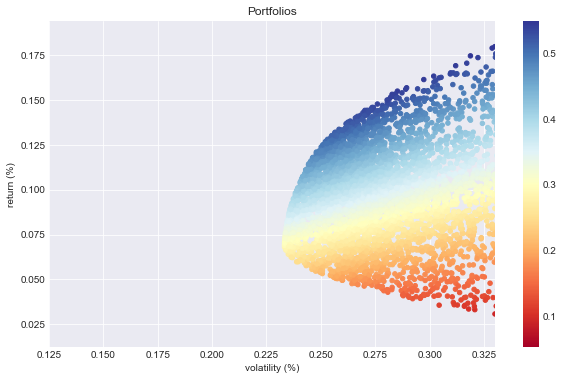

In [71]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios")
ax.set_ylabel("return (%)")
ax.grid()


ax.set_xlim([0.125,0.33])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()



در این نمودار تمامی 4000 پرتفو مد نظر را مشاهده میکنیم که میبینیم برای پرتفوها با بازدهی های مختلف چقدر ریسک کنیم

### در این نمودار دو پرتفو هستند که برای ما بسیار مهم اند و ما عاشق اینیم که اینها رو پیدا کنیم!!!
1. the **portfolio with the Global Minimum Volatility (GMV)**  (MVP)
2. the **portfolio with the Maximum Sharpe Ratio (MSR)**.

از کد بالا به راحتی می‌توانیم با مشاهده کمترین نوسان و بالاترین نسبت شارپ، این دو پورتفولیو را در دیتافریم خود بیابیم و وزن‌های مربوطه ذخیره شده را بازیابی کنیم.

In [72]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )



------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 6.91%
- volatility  : 23.33%
- sharpe ratio: 0.30


In [73]:
# یافتن پرتفو با بالا ترین نسبت شارپ
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print(36 * "-")
print("Maximum Sharpe Ratio portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

------------------------------------
Maximum Sharpe Ratio portfolio:
------------------------------------
- return      : 17.48%
- volatility  : 31.87%
- sharpe ratio: 0.55


In [74]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# یافتن پرتفو با بالا ترین نسبت شارپ
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print(36 * "-")
print("Maximum Sharpe Ratio portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 6.91%
- volatility  : 23.33%
- sharpe ratio: 0.30
------------------------------------
Maximum Sharpe Ratio portfolio:
------------------------------------
- return      : 17.48%
- volatility  : 31.87%
- sharpe ratio: 0.55


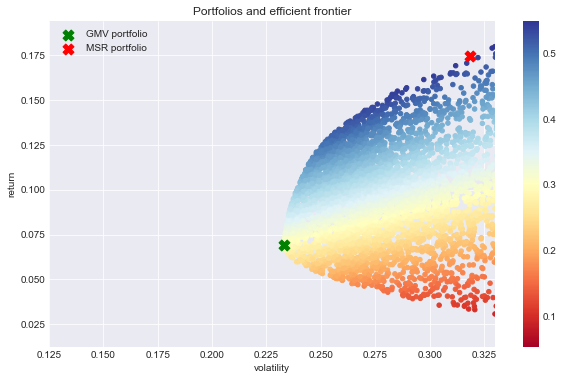

In [75]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# مشخص کردن دو نقطه حساس ما در نمودار
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

 تابع زیر را تعریف می کنیم که زیرا چندین بار از آن استفاده خواهیم کرد  

In [76]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
    vol = msj.portfolio_vol(weights, covmat)
    vol = msj.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = msj.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = msj.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

### Finding the optimal portfolios: minimizing the volatility 

در آزمایش‌های بالا، با شبیه‌سازی تعداد بالایی از پورتفولیوها و سپس ترسیم آن‌ها، پورتفولیوهای بهینه را یافتیم، یعنی نمونه‌هایی که در مرز کارا هستند. از خود نمودار می توانستیم ببینیم که مرز کارا چگونه به نظر می رسد. با این حال، می‌توانیم با حل یک مسئله کمینه‌سازی، به عنوان مثال، با استفاده از روش بهینه‌سازی مرز کارا را پیدا کنیم.


برای مثال، فرض کنید می‌خواهیم پورتفولیویی (در مرز کارآمد) را پیدا کنیم که دارای حداقل نوسان است. سپس مشکل کمینه سازی این است:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

In [77]:
#  کل بازده (سالانه) شرکت هایی را که در آنها سرمایه گذاری می کنیم ببینیم
ann_rets = msj.annualize_rets(daily_rets, periods_per_year)
ann_rets

AMZN    0.015158
KO      0.083038
MSFT    0.190528
dtype: float64

اکنون می‌توانیم حداقل کننده خود را فرا بخوانیم که مشکل کمینه‌سازی یافتن وزن پرتفوی با حداقل نوسان را حل می‌کند.

In [78]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets)
print("optimal weights:")
print(18 * "-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
------------------
  AMZN: 21.42%
  KO:   78.58%
  MSFT: 0.00%


In [79]:
portfolios.iloc[2753]

return          0.070932
volatility      0.268375
sharpe ratio    0.264302
w1              0.440427
w2              0.394065
w3              0.165508
Name: 2753, dtype: float64

لذا می‌توانیم تأیید کنیم که حداقل پورتفولیوی نوسانی که با حل مسئله کمینه‌سازی به‌دست می‌آید تقریباً با نمونه‌ای که از شبیه‌سازی تعداد زیادی پرتفوی به‌دست می‌آید مطابق است، همانطور که قبلاً انجام داده‌ایم:

Portfolio return:       6.85%
Portfolio volatility:   23.32%
Portfolio sharpe ratio: 0.29


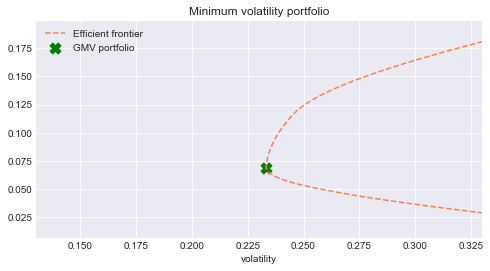

In [80]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='g', s=120, label="GMV portfolio")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Minimum volatility portfolio")
plt.show()

In [81]:
print("GMV portfolio:\n")
print("- Monte carlo:")
print(22*"-")
print("  return:       {:.2f}%" .format(low_vol_portfolio[0]*100))
print("  volatility:   {:.2f}%" .format(low_vol_portfolio[1]*100))
print("  sharpe ratio: {:.2f}" .format(low_vol_portfolio[2]))
print("\n- Minimization problem:")
print(22*"-")
print("  return:       {:.2f}%" .format(ret*100))
print("  volatility:   {:.2f}%" .format(vol*100))
print("  sharpe ratio: {:.2f}" .format(shp))

GMV portfolio:

- Monte carlo:
----------------------
  return:       6.91%
  volatility:   23.33%
  sharpe ratio: 0.30

- Minimization problem:
----------------------
  return:       6.85%
  volatility:   23.32%
  sharpe ratio: 0.29


#### یافتن پرتفوی بهینه: با به حداقل رساندن نوسانات با بازده ثابت

اگر بخواهیم پورتفولیو (در مرز کارا) با حداقل نوسان برای یک سطح بازده معین پیدا کنیم، چه؟

در این مورد، ما به سادگی باید یک محدودیت در مسئله کمینه سازی اضافه کنیم:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} = R_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
$R_0$ ===> سطح ثابتی از بازده می باشد

به عنوان مثال فرض کنید که ما بازده ثابت 16 درصد مد نظرمان است

In [150]:
target_return = 0.16

اکنون ما با فراخواندن تابع حداقل کننده می آییم مسئله را با محدودیت جدید حل میکنیم

In [151]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets, target_return)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   28.40%
  MSFT: 71.60%


اجازه دهید نوسانات پورتفولیوی ساخته شده با این وزن ها را محاسبه کنیم.


In [152]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       16.00%
Portfolio volatility:   29.28%
Portfolio sharpe ratio: 0.34


به یاد داشته باشید که بازده پرتفوی مقداری بین حداقل و حداکثر بازده از دارایی های تشکیل دهنده سبد خواهد بود. 

In [85]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets, 0.4)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   0.00%
  MSFT: 100.00%


In [86]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       19.05%
Portfolio volatility:   34.97%
Portfolio sharpe ratio: 0.54


### یافتن پرتفوی بهینه: به حداکثر رساندن نسبت شارپ

حال، قرار است که (در مرز کارا) پرتفو با بالاترین نسبت شارپ را پیدا کنیم.

scipy ===>   توجه داشته باشید که این کتابخانه یک روش بهینه سازی ارائه می دهد، اما یک روش به حداکثر رساندن را ارائه نمی دهد، و سپس ممکن است به این نتیجه برسیم که با حل یک مسئله بهینه سازی نمی توانیم چنین پورتفولیویی را پیدا کنیم. با این حال، حداکثر کردن نسبت شارپ چیزی نیست جز به حداقل رساندن نسبت شارپ منفی. یعنی داریم


$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$



In [87]:
#add to msj

def maximize_sharpe_ratio(rets, covmatrix, risk_free_rate, periods_per_year, target_volatility=None):
    '''
    وزن های بهینه بالاترین نسبت شارپ را در مرز کارا را برمی گرداند. 
    if target_volatility is not None ===>  وزن ها با بالاترین نسبت شارپ پرتفوی را نشان میدهد .
    این روش از بهینه ساز مینیماز  استفاده می کند که مشکل حداکثر کردن نسبت شارپ را حل می کند که معادل به حداقل رساندن نسبت شارپ منفی است.
    '''
    n_assets   = rets.shape[0] 
    init_guess = np.repeat(1/n_assets, n_assets)
    weights_constraint = {
        "type": "eq",
        "fun": lambda w: 1.0 - np.sum(w)  
    }
    if target_volatility is not None:
        volatility_constraint = {
            "type": "eq",
            "args": (covmatrix, periods_per_year),
            "fun": lambda w, cov, p: target_volatility - annualize_vol(portfolio_volatility(w, cov), p)
        }
        constr = (volatility_constraint, weights_constraint)
    else:
        constr = weights_constraint
        
    def neg_portfolio_sharpe_ratio(weights, rets, covmatrix, risk_free_rate, periods_per_year):
        '''
        نسبت شارپ سالانه منفی را برای مشکل کمینه‌سازی پورتفولیوهای بهینه محاسبه می‌کند.
        The variable periods_per_year ===> 12, 52, 252.
    
        '''
        # بازده سالانه پرتفوی
        portfolio_ret = portfolio_return(weights, rets)        
        
        # نوسانات سالانه پرتفوی
        portfolio_vola = annualize_vol(portfolio_vol(weights, covmatrix), periods_per_year)
        return -sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vola)    
        #-(portfolio_ret - risk_free_rate)/portfolio_vol
        
    result = minimize(neg_portfolio_sharpe_ratio,
                      init_guess,
                      args = (rets, covmatrix, risk_free_rate, periods_per_year),
                      method = "SLSQP",
                      options = {"disp": False},
                      constraints = constr,
                      bounds = ((0.0,1.0),)*n_assets)
    return result.x


In [88]:
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   17.29%
  MSFT: 82.71%


In [89]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       17.19%
Portfolio volatility:   31.34%
Portfolio sharpe ratio: 0.55


In [90]:
# add to msj

def efficient_frontier(n_portfolios, rets, covmat, periods_per_year, risk_free_rate=0.0, 
                       iplot=False, hsr=False, cml=False, mvp=False, ewp=False):
    ''' 
    if iplot=True ===> این روش یک دیتافریم حاوی نوسانات، بازده ها، نسبت های شارپ و وزن پورتفولیوها و همچنین نموداری از مرز کارا را برمی گرداند
     
    دیگر ورودی ها:
        hsr ===> if true ===> سبد با بالاترین بازده را رسم میکند
        cml ===> if true ===> خط بازار سرمایه را رسم میکند 
        mvp ===> if true ===> پرتفولیو با حداقل ریسک را رسم میکند
        ewp ===> if true ===> پرتفوی با وزن های برابر را رسم میکند 
        periods_per_year ===> 12, 52, 252, monthly, weekly, daily.
    '''   
    
    def append_row_df(df,vol,ret,spr,weights):
        temp_df = list(df.values)
        temp_df.append( [vol, ret, spr,] + [w for w in weights] )
        return pd.DataFrame(temp_df)
        
    ann_rets = annualize_rets(rets, periods_per_year)
    
    # وزن های بهینه پورتفولیوهایی را که در مرزهای کارا قرار دارند تولید می کند
    weights = optimal_weights(n_portfolios, ann_rets, covmat, periods_per_year) 
    # همچنین اگر سبد فقط از دو دارایی تشکیل شده باشد، وزن ها می توانند به صورت زیر باشند: 
    #weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_portfolios)]

    # portfolio returns
    portfolio_ret = [portfolio_return(w, ann_rets) for w in weights]
    
    # portfolio volatility
    vols          = [portfolio_vol(w, covmat) for w in weights] 
    portfolio_vola = [annualize_vol(v, periods_per_year) for v in vols]
    
    # portfolio sharpe ratio
    portfolio_spr = [sharpe_ratio(r, risk_free_rate, periods_per_year, v=v) for r,v in zip(portfolio_ret,portfolio_vola)]
    
    df = pd.DataFrame({"volatility": portfolio_vola,
                       "return": portfolio_ret,
                       "sharpe ratio": portfolio_spr})
    df = pd.concat([df, pd.DataFrame(weights)],axis=1)
    
    if iplot:
        ax = df.plot.line(x="volatility", y="return", style="--", color="coral", grid=True, label="Efficient frontier", figsize=(8,4))
        if hsr or cml:
            w   = maximize_sharpe_ratio(ann_rets, covmat, risk_free_rate, periods_per_year)
            ret = portfolio_return(w, ann_rets)
            vol = annualize_vol( portfolio_vol(w,covmat), periods_per_year)
            spr = sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)
            df  = append_row_df(df,vol,ret,spr,w)
            if cml:
                # Draw the CML====> نقطه های خط بازار سرمایه [0,risk_free_rate] و [port_vol,port_ret]
                ax.plot([0, vol], [risk_free_rate, ret], color="g", linestyle="-.", label="CML")
                ax.set_xlim(left=0)
                ax.legend()
            if hsr:
                # بالاترین نسبت شارپ را رسم میکند
                ax.scatter([vol], [ret], marker="o", color="g", label="MSR portfolio")
                ax.legend()
        if mvp:
            # پرتفو با حداقل نوسانات و ریسک را رسم میکند
            w   = minimize_volatility(ann_rets, covmat)
            ret = portfolio_return(w, ann_rets)
            vol = annualize_vol( portfolio_vol(w,covmat), periods_per_year)
            spr = sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)
            df  = append_row_df(df,vol,ret,spr,w)
            ax.scatter([vol], [ret], color="midnightblue", marker="o", label="GMV portfolio")
            ax.legend()  
        if ewp:
            # پرتفو با وزن های برابر را رسم میکند
            w   = np.repeat(1/ann_rets.shape[0], ann_rets.shape[0])
            ret = portfolio_return(w, ann_rets)
            vol = annualize_vol( portfolio_vol(w,covmat), periods_per_year)
            spr = sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)
            df  = append_row_df(df,vol,ret,spr,w)
            ax.scatter([vol], [ret], color="goldenrod", marker="o", label="EW portfolio")
            ax.legend()
        return df, ax
    else: 
        return df

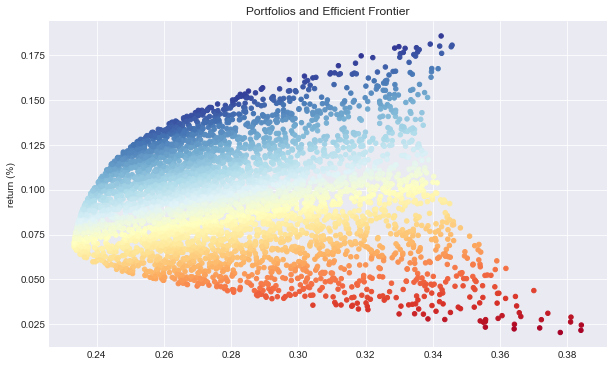

In [91]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()


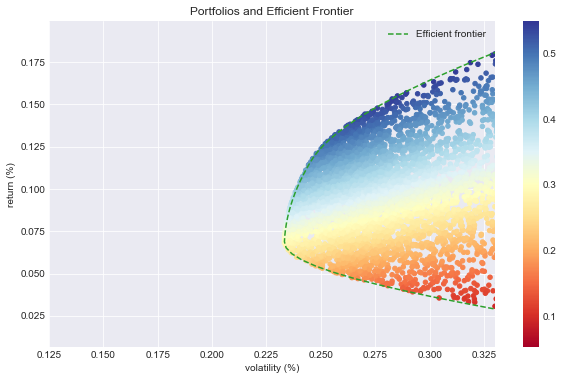

In [92]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()

# رسم مرز کارا
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="tab:green", ax=ax, grid=True, label="Efficient frontier")
ax.set_xlim([0.125,0.33])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

Portfolio return:       17.19%
Portfolio volatility:   31.34%
Portfolio sharpe ratio: 0.55


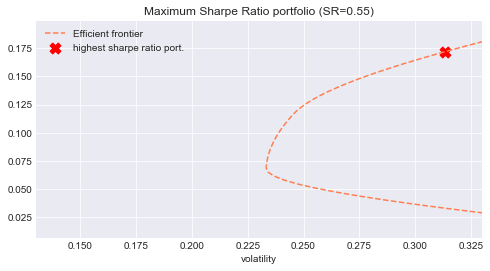

In [93]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# رسم مرز کارا
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highest sharpe ratio port.")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio (SR={:.2f})".format(shp))
plt.show()

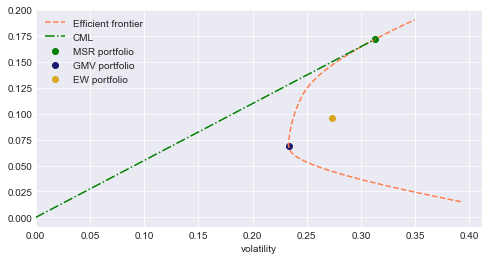

In [94]:
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year , iplot = True , hsr = True , cml = True , mvp = True , ewp = True)

#### یافتن پرتفوی بهینه: نسبت شارپ را با توجه به نوسانات(ریسک) ثابت به حداکثر برسانید

مشابه آنچه قبلاً انجام داده‌ایم، می‌توانیم (در مرز کارا) به بالاترین نسبت شارپ برای یک سطح مشخص از نوسان دست پیدا کنیم. در این مورد، ما به سادگی یک محدودیت در مسئله کمینه سازی اضافه می کنیم:
$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$
subject to 
$$
\begin{cases}
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} = \sigma_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
$\sigma_0$ ===> همان نسبت ثابتی از میزان ریسک است

به عنوان مثال ما سطح نوسان ثابت 20 درصد برایمان هدف است

In [118]:
ity = 0.20
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year, target_volatility=ity)

print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

  AMZN: 21.41%
  KO:   78.59%
  MSFT: 0.00%


In [119]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       6.85%
Portfolio volatility:   23.32%
Portfolio sharpe ratio: 0.04


### به حداکثر رساندن پرتفوی نسبت شارپ در حضور نرخ بدون ریسک غیر صفر

به یاد داشته باشید که دارایی بدون ریسک , دارایی به شمار میرود که بدون ریسک بازده مشخصی را پرداخت میکند . برای مثال، اوراق بهادار دولتی کوتاه‌مدت (مانند اسناد خزانه ) به‌عنوان دارایی بدون ریسک استفاده می‌شوند، زیرا نرخ بهره ثابتی می‌پردازند و ریسک نکول پایینی دارند.


دارایی بدون ریسک دارای نوسان(ریسک) صفر است. علاوه بر این، با هیچ دارایی دیگری همبستگی ندارد زیرا طبق تعریف، نوسان آن صفر است. بنابراین، هنگامی که با هر دارایی دیگری در یک سبد ترکیب می شود، تغییر در بازده به طور خطی با تغییر در ریسک مرتبط است زیرا نسبت ها در ترکیب متفاوت است.

#### The capital market line (CML)  (خط بازار سرمایه)

هنگامی که دارایی بدون ریسک معرفی می شود، خطی وجود خواهد داشت که رضایت بخش است:

 1. مماس بر منحنی پرتفوی پرخطر با بالاترین نسبت شارپ است.
 2. عرض از مبدا آن, پرتفو با 100% دارایی بدون ریسک است
 3. نقطه مماس با منحنی نشان دهنده بالاترین نسبت شارپ پرتفوی بدون دارایی های بدون ریسک و 100% دارایی های ریسک دار است.
 
 4. نقاط این خط نشان دهنده پرتفوی هایی است که حاوی مقادیر مثبت دارایی های پرریسک و دارایی های بدون ریسک است. 
 
این خط کارا و بهینه **خط بازار سرمایه** نامیده می‌شود و داریم:
$$
R_{CML} = R_{f} + \sigma_{CML}\frac{R_{p} - R_{f}}{\sigma_{p}}, 
$$
$R_{CML}$ and $\sigma_{CML}$ =====> نشان دهنده بازده و نوسانات پرتفویی است که به ترتیب دارایی های پرریسک و دارایی های بدون ریسک را ترکیب می کند.

<img src="cml1.png" width="600" height="350">
<img src="cml2.png" width="600" height="350">
<img src="cml3.png" width="600" height="350">


## نکته بسیار مهم

### زمانی که نرخ بدون ریسک وجود داشته باشد, دیگر مرز بهینه برابر مرز بهینه مارکوویتز برای پرتفوهای کارا نیست. 
### بلکه مرز بهینه جدید خط بازار سرمایه رسم شده است

In [136]:
risk_free_rate = 0.06
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 0.00%
  KO:   0.00%
  MSFT: 100.00%


In [129]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       19.05%
Portfolio volatility:   34.97%
Portfolio sharpe ratio: 0.37


اجازه دهید مرز کارا و خط بازار سرمایه را با استفاده از مولفه های بهینه  در نمودار خود رسم کنیم:

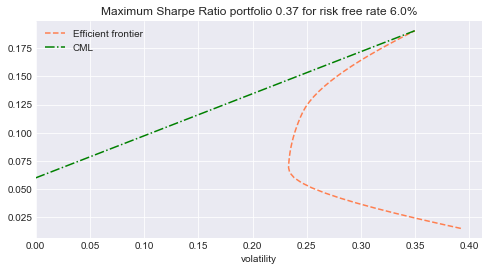

In [130]:
df, ax = msj.efficient_frontier(40, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

معرفی دارایی بدون ریسک به عنوان یکی از اجزای جدید پرتفوی، دامنه ترکیبات نوسان-بازده موجود را بهبود بخشیده است، زیرا در همه جا، به جز در پرتفوی مماس،  بازدهی بالاتری نسبت به مرز کارا (قدیمی) در همه سطوح نوسانات ارائه می دهد.

efficient frontier method ====> توجه داشته باشید که این تابع دارای پارامتر اختیاری دیگری برای ترسیم پرتفوی با بالاترین نسبت شارپ، پرتفوی با حداقل نوسانات و همچنین پرتفوی با وزن یکسان است :

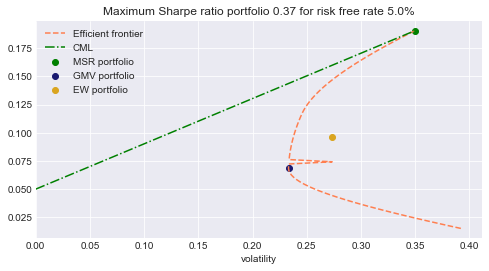

In [132]:
risk_free_rate = 0.05
df, ax = msj.efficient_frontier(90, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Maximum Sharpe ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

In [133]:
df.tail()

,0,1,2,3,4,5
88,0.345605,0.188558,0.400914,1.110223e-16,1.833137e-02,0.981669
89,0.349659,0.190528,0.401900,0.000000e+00,2.274521e-16,1.000000
90,0.349659,0.190528,0.401900,8.807826e-16,0.000000e+00,1.000000
91,0.233240,0.068495,0.079298,2.142333e-01,7.857667e-01,0.000000
92,0.273453,0.096241,0.169102,3.333333e-01,3.333333e-01,0.333333


### Maximizing the sharpe ratio = Minimizing volatility when we invest also in a risk free asset

Suppose that along with the set of risky assets there is also a risk-free asset with volatility zero and return equal to the risk-free rate $R_f$. In this case, we may want to minimize the volatility of the portfolio (i.e., the volatility of the part of the portfolio invested in the risky assets, since the the risk-free asset, by definition, is risk free) in which we have allocated some weights $\mathbf{w}$ in the risky assets and the remaining part of our capital, i.e., $1-\mathbf{w}^T\mathbf{1}$, in the risk-free asset:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} + (1 - \mathbf{w}^T\mathbf{1})R_f &= R_0,  \\
\end{cases}
$$
Note that in this case we can **short sell** the assets and we invest all of the capital. 
We define the Lagrangian:
$$
\mathcal{L}(\mathbf{w}, \lambda) := 
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} 
- \lambda\left( \mathbf{w}^T \mathbf{R} + (1-\mathbf{w}^T\mathbf{1})R_f - R_0\right),
$$
and put the partial derivatives to zero:
$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda \mathbf{R} + \lambda R_f \mathbf{1}= 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} - (1-\mathbf{w}\mathbf{1})R_f + R_0 = 0, \\
\end{cases}
$$
From the first equation we get:
$$
\mathbf{w} = \lambda \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}), 
$$
and we can insert it in the second equation:
$$
\left( \lambda\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^T \mathbf{R} + \left( 1 - (\lambda\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}))^T\mathbf{1}   \right) R_f = R_0
\quad \Longrightarrow\quad 
\lambda = \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})}.
$$
We can now put $\lambda$ back into the expression for the weigths:
$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$
We found the otpimal weight allocations to the risky assets. The allocation to the risk-free rate would be then given by 
$1-\mathbf{w^*}^T\mathbf{1}$. 

#### Portfolio return and volatility
Notice that a portfolio with these weigths should give, by definition, a return equal to the target return $R_0$. 
In fact:
$$
\mu_p = \mathbf{w^*}^T \mathbf{R} + (1 - \mathbf{w^*}^T\mathbf{1})R_f 
= r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} + R_f - r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1} R_f \mathbf{1} 
= \underbrace{ r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }_{= R_0 - R_f}   + R_f  = R_0.
$$
Right. The volatility of the portfolio is given by:
$$
\sigma_p^2 = \mathbf{w^*}^T\Sigma\mathbf{w^*} 
= \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right)^T \Sigma \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right) 
= r^2 (\mathbf{R} - R_f\mathbf{1})^T \Sigma^{-1}\underbrace{\Sigma\Sigma^{-1}}_{=Id} (\mathbf{R} - R_f\mathbf{1}) 
= \frac{(R_0-R_f)^2}{ \left( (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 } 
(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})
$$
that is:
$$
\sigma_p = \frac{(R_0-R_f)}{ \sqrt{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }.
$$

#### Portoflio weigths when full allocation is done to the risky assets (MSR)

If, even in case of risk-free asset, we decide to allocate all the capital to the risky assets we can easily find the weights by normalizing the efficient weights we have found before. In particular, notice that $\mathbf{w}^*$ is proportional to the vector 
$\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$ with the constant of proportionality equal to $r$. 
Hence we can define the weigths:
$$
\mathbf{w}_M := \frac{\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) },
$$
where notice that the denominator is simply the sum of the weigths in $\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$, i.e., weights in $w_M$ sum to $1$, and correspond to a full allocation of money in the risky assets and zero to the risk-free rate asset. 

Note that the return of such portfolio is given by:
$$
\mu_M = \mathbf{w}_M^T\mathbf{R} = \frac{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})}, 
$$
while the volatility is:
$$
\sigma_M^2 = \mathbf{w}_M^T \Sigma \mathbf{w}_M 
= \frac{1}{ \left( \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})  \right)^2 } 
(\mathbf{R}-R_f\mathbf{1})^T\underbrace{\Sigma^{-1}\Sigma}_{=Id}\Sigma^{-1} (\mathbf{R}-R_f\mathbf{1}) 
= \frac{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}{ \left( \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 }
\quad \Longrightarrow\quad 
\sigma_M = 
\frac{ \sqrt{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}  }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})  }.
$$

The portoflio of only risky assets with weights given by $\mathbf{w}_M$ is, by constuction, a portfolio with a minimum volatility lying on the efficient frontier. However, we can see that **it is also the portfolio with the highest Sharpe Ratio**. 



In [ ]:
# add to msj

from numpy.linalg import inv
def inverse_df(d):
    '''
    Inverse of a pd.DataFrame (i.e., inverse of dataframe.values)
    '''
    return pd.DataFrame( inv(d.values), index=d.columns, columns=d.index)

In [134]:
invcov = msj.inverse_df(cov_rets)
ones   = np.repeat(1,3) 
r_rf   = ann_rets - risk_free_rate*ones

In [135]:
w_M = np.dot( invcov, r_rf ) / np.dot( ones, np.dot(invcov, r_rf) )
w_M

array([-6.73000882, -2.51329524, 10.24330406])

In [ ]:
def weigths_max_sharpe_ratio(covmat, mu_exc, scale=True):
    '''
    - mu_exc ===> بردار بازده مورد انتظار مازاد است (باید بردار ستونی به عنوان یک سری پانداسی باشد)
    - covmat ===> covariance N x N matrix as a pd.DataFrame
    '''
    w = inverse_df(covmat).dot(mu_exc)
    if scale:
        # normalize weigths
        w = w/sum(w) 
    return w
    

In [137]:
msj.weigths_max_sharpe_ratio(cov_rets, r_rf)

AMZN    -6.730009
KO      -2.513295
MSFT    10.243304
dtype: float64

In [138]:
msj.weigths_max_sharpe_ratio(cov_rets, r_rf).values

array([-6.73000882, -2.51329524, 10.24330406])

$\mu_M$ and $\sigma_M$ ====> حال، اجازه دهید بررسی کنیم که پرتفوی با این وزن ها مانند فرمول ها دارای بازده و نوسان است.

In [139]:
# محاسبه بازده با استفاده از روش بازده پرتفو
mu_M = msj.portfolio_return(w_M, ann_rets)
mu_M 

1.640928160132169

In [140]:
# محاسبه بازده با استفاده از فرمولی که ما یافتیم
mu_M = np.dot( r_rf, np.dot(invcov, ann_rets) ) / np.dot(ones, np.dot(invcov,r_rf) )
mu_M 

1.640928160132169

In [141]:
# volatility: portfolio vol method
sigma_M = msj.annualize_vol( msj.portfolio_vol(w_M, cov_rets), periods_per_year)
sigma_M

2.369940799245883

In [142]:
# volatility: using the formula
sigma_M = np.sqrt( np.dot(r_rf, np.dot(invcov,r_rf)) ) / np.dot(ones, np.dot(invcov,r_rf))
sigma_M = msj.annualize_vol(sigma_M , periods_per_year)
sigma_M

2.369940799245883

$\mathbf{w}^*$ ====> حال تعریف می کنیم که وزن پرتفویی که هم در دارایی های بدون ریسک و هم در دارایی های پرریسک سرمایه گذاری می کند را با این علامت مشخص می کنیم:

$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$

In [143]:
target_ret = 0.13
wstar = (target_ret - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf)             
wstar

array([-0.29611684, -0.11058367,  0.45069998])

#### همانطور که میبینیم جمعشان یک نمی شود زیرا دارایی بدون ریسک را که هنوز لحاظ نکردیم

پس به این وزن ها باید وزن دارایی بدون ریسک را نیز اضافه کنیم

In [144]:
np.append( wstar, 1-wstar.sum() )

array([-0.29611684, -0.11058367,  0.45069998,  0.95600053])

آخرین وزن در دارایی بدون ریسک است.

بازده چنین پورتفولیو طبق تعریف برابر با بازده هدف است:

In [145]:
# تست می کنیم

mu_p = msj.portfolio_return( np.append(wstar,1-wstar.sum()) , ann_rets.append(pd.Series(risk_free_rate)) )
mu_p

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\3536392848.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mu_p = msj.portfolio_return( np.append(wstar,1-wstar.sum()) , ann_rets.append(pd.Series(risk_free_rate)) )


0.12956000527393907

بیایید نوسانات چنین پورتفولیویی را ببینیم:

In [146]:
# portfolio_volatility method
msj.annualize_vol( msj.portfolio_vol(wstar, cov_rets), periods_per_year)

0.1042761452744854

In [153]:
# با استفاده از فرمولی که یافتیم
sigma_p = msj.annualize_vol( (target_ret - risk_free_rate) / np.sqrt(np.dot(r_rf, np.dot(invcov,r_rf))), periods_per_year )
sigma_p

0.1042761452744854

In [163]:
# مقایسه دو حالت با دارایی بدون ریسک و بدون آن
target_return = 0.13
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets, target_return)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   56.31%
  MSFT: 43.69%


In [158]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       13.00%
Portfolio volatility:   25.46%
Portfolio sharpe ratio: 0.27


در نهایت، اجازه دهید بررسی کنیم که تمام سبدهایی که با استفاده از وزن‌های به دست آمده ساخته شده‌اند، در خط بازار سرمایه قرار دارند.

ما مجموعه ای از بازده هدف را تعریف می کنیم، از بازده هدف اصلی 0.06 تا بازده پرتفو با حداکثر نسبت شارپ:

$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$

In [159]:
target_ret_vec = np.linspace(target_ret,mu_M,20)   # بیست نقطه بین بازده 6 درصد و بازده پرتفو با حداکثر نسبت شارپ انتخاب میکنیم
wstar = [ (tr - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf) for tr in target_ret_vec ]         
wstar = [ np.append(wstar[i], 1-wstar[i].sum()) for i in range(len(wstar)) ]
wstar 

[array([-0.29611684, -0.11058367,  0.45069998,  0.95600053]),
 array([-0.63251629, -0.23621071,  0.96271147,  0.90601553]),
 array([-0.96891574, -0.36183776,  1.47472296,  0.85603054]),
 array([-1.30531519, -0.48746481,  1.98673446,  0.80604555]),
 array([-1.64171464, -0.61309186,  2.49874595,  0.75606055]),
 array([-1.9781141 , -0.7387189 ,  3.01075744,  0.70607556]),
 array([-2.31451355, -0.86434595,  3.52276894,  0.65609056]),
 array([-2.650913  , -0.989973  ,  4.03478043,  0.60610557]),
 array([-2.98731245, -1.11560005,  4.54679192,  0.55612057]),
 array([-3.3237119 , -1.2412271 ,  5.05880342,  0.50613558]),
 array([-3.66011135, -1.36685414,  5.57081491,  0.45615059]),
 array([-3.99651081, -1.49248119,  6.08282641,  0.40616559]),
 array([-4.33291026, -1.61810824,  6.5948379 ,  0.3561806 ]),
 array([-4.66930971, -1.74373529,  7.10684939,  0.3061956 ]),
 array([-5.00570916, -1.86936234,  7.61886089,  0.25621061]),
 array([-5.34210861, -1.99498938,  8.13087238,  0.20622562]),
 array([

اینها وزن هایی هستند که برای رسیدن آن 20 بازده مد نظر باید درشان سرمایه گذاری شود.

In [164]:
mus = [msj.portfolio_return(wstar[i], ann_rets.append(pd.Series(risk_free_rate))) for i in range(len(wstar)) ]
sigmas = [msj.annualize_vol((tr - risk_free_rate) / np.sqrt(np.dot(r_rf, np.dot(invcov,r_rf))), periods_per_year) for tr in target_ret_vec]

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2875559829.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mus = [msj.portfolio_return(wstar[i], ann_rets.append(pd.Series(risk_free_rate))) for i in range(len(wstar)) ]
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2875559829.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mus = [msj.portfolio_return(wstar[i], ann_rets.append(pd.Series(risk_free_rate))) for i in range(len(wstar)) ]
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_15440\2875559829.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mus = [msj.portfolio_return(wstar[i], ann_rets.append(pd.Series(risk_free_rate))) for i in range(len(wstar)) ]
C:\Users\Lenovo L3\AppData\Local\Temp\ipykerne

In [165]:
mus

[0.12956000527393907,
 0.20858269007644786,
 0.2876053748789567,
 0.3666280596814655,
 0.44565074448397435,
 0.5246734292864831,
 0.6036961140889919,
 0.6827187988915008,
 0.7617414836940095,
 0.8407641684965184,
 0.9197868532990273,
 0.9988095381015359,
 1.0778322229040445,
 1.1568549077065533,
 1.2358775925090624,
 1.3149002773115712,
 1.39392296211408,
 1.4729456469165891,
 1.5519683317190973,
 1.6309910165216062]

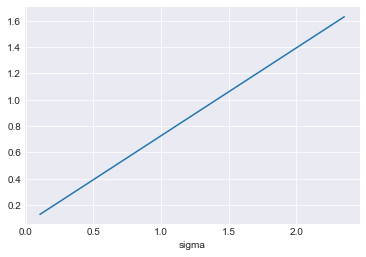

In [166]:
CML = pd.concat([pd.DataFrame(sigmas),pd.DataFrame(mus)], axis=1) 
CML.columns = ["sigma","mu"]
CML.plot.line(x="sigma", y="mu", grid=True, legend=False)
plt.show()